In [3]:
import numpy as np

In [1]:
class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [3]:
mon = Momentum()

In [5]:
x = -7
y = 2

z = 1/20*x**2 + y**2

In [105]:
params = {"x":-7, "y":2}
momentum=0.9
lr = 0.01

x_list = []
y_list = []
for _ in range(2):
    if v == None:
        v = {}
        for key, val in params.items():
            v[key] = np.zeros_like(val)

    for key in params.keys():
        grads = gradient(params)
        # v[key] = momentum*v[key] - lr*grads[key] 
        v[key] = -lr*grads[key] 
        params[key] += v[key]
        
        if key == 'x':
            x_list.append(params[key])
        else:
            y_list.append(params[key])

In [99]:
x_list

[-6.9519667417263, -6.90173680927997]

In [101]:
y_list

[1.7347817554359999, 1.4613853353283999]

In [106]:
x_list

[-6.993, -6.986000000000001]

In [107]:
y_list

[1.96, 1.9208]

In [91]:
def gradient(param):
    grads = {}
    # backward
    for idx, (key, value) in enumerate(params.items()):
        dz = 1
        
        if idx == 0:
            grads[key] = round(1/10*value, 2)
        else:
            grads[key] = round(2*value, 2)
            
    return grads

In [87]:
params = {"x":-7, "y":2}
v = {}
for key, val in params.items():
    v[key] = np.zeros_like(val)

## 他の人の参考

### https://www.anarchive-beta.com/entry/2020/08/10/180000

In [4]:
# この項で利用するライブラリを読み込む
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# Momentumの実装
class Momentum:
    
    # インスタンス変数を定義
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr # 学習率
        self.momentum = momentum # vの調整項
        self.v = None # 速度
    
    # パラメータの更新メソッドを定義
    def update(self, params, grads):
        # vを初期化
        if self.v is None: # 初回のみ
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val) # 全ての要素が0
        
        # パラメータごとに値を更新
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] # 式(6.3)
            params[key] += self.v[key] # 式(6.4)
            
# 上記は本と同じ


In [110]:
# 式(6.2)
def f(x, y):
    return x ** 2 / 20.0 + y ** 2

# 式(6.2)の勾配(偏微分)
def df(x, y):
    # 偏微分
    dx = x / 10.0 # df / dx
    dy = 2.0 * y # df / dy
    return dx, dy # (値を2つ出力！)

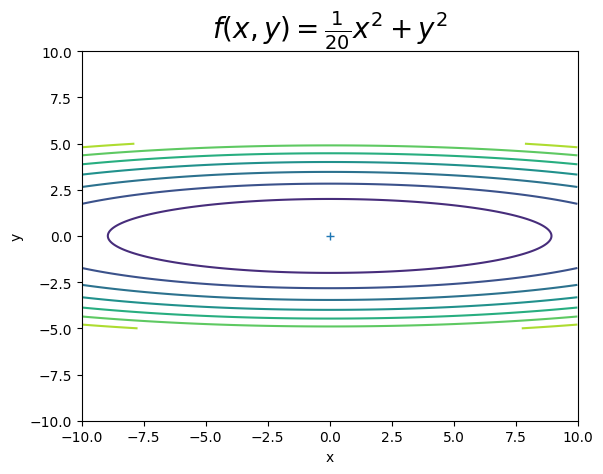

In [111]:
# 等高線用の値
x = np.arange(-10, 10, 0.01) # x軸の値
y = np.arange(-5, 5, 0.01) # y軸の値
X, Y = np.meshgrid(x, y) # 格子状の点に変換
Z = f(X, Y)

# 作図
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("$f(x, y) = \\frac{1}{20} x^2 + y^2$", fontsize=20) # タイトル
plt.show()

In [159]:
# パラメータの初期値を指定
params = {}
params['x'] = -7.0
params['y'] = 2.0

# 勾配の初期値を指定
grads = {}
grads['x'] = 0
grads['y'] = 0

# 学習率を指定
lr = 0.1

# モーメンタムを指定
momentum = 0.9

# インスタンスを作成
optimizer = Momentum(lr=lr, momentum=momentum)

In [160]:
# 試行回数を指定
iter_num = 30

# 更新値の記録用リストを初期化
x_history = []
y_history = []

# 初期値を保存
x_history.append(params['x'])
y_history.append(params['y'])

# 関数の最小値を探索
for _ in range(iter_num):
    
    # 勾配を計算
    grads['x'], grads['y'] = df(params['x'], params['y'])
    
    # パラメータを更新
    optimizer.update(params, grads)
    
    # パラメータを記録
    x_history.append(params['x'])
    y_history.append(params['y'])

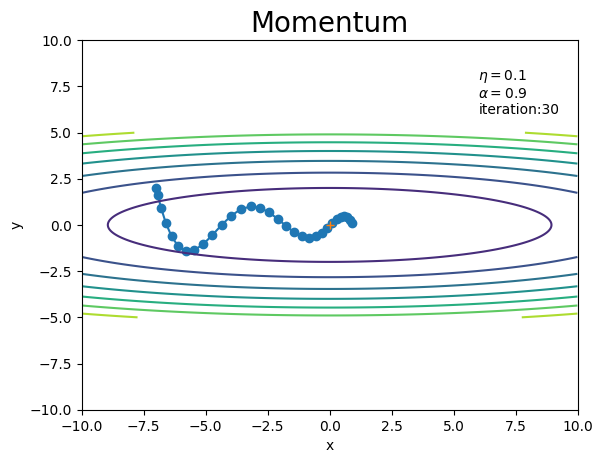

In [161]:
# 作図
plt.plot(x_history, y_history, 'o-') # パラメータの推移
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("Momentum", fontsize=20) # タイトル
plt.text(6, 6, "$\\eta=$" + str(lr) + "\n$\\alpha=$" + str(momentum) + "\niteration:" + str(iter_num)) # メモ
plt.show()

ゼロつくではSGDでは学習率0.95でmomentumでは学習率を0.01で行っているにもかかわらず、
同じ条件で実施している程で話しているから、違和感がある。
SGDではX軸にほぼ平坦であるので、すぐにy＝０で落ち着いてしまう。このため。momentumが良い仕事をしているのではと思う。

## adamの実装

In [7]:
# 式(6.2)
def f(x, y):
    return x ** 2 / 20.0 + y ** 2

# 式(6.2)の勾配(偏微分)
def df(x, y):
    # 偏微分
    dx = x / 10.0 # df / dx
    dy = 2.0 * y # df / dy
    return dx, dy # (値を2つ出力！)

In [56]:
from common.optimizer import Adam

# パラメータの初期値を指定
params = {}
params['x'] = -7.0
params['y'] = 2.0

# 勾配の初期値を指定
grads = {}
grads['x'] = 0
grads['y'] = 0

# beta1, beta2と学習率の設定
lr = 0.3
beta1 = 0.9
beta2 = 0.99


# インスタンスを作成
optimizer = Adam(lr=lr, beta1=beta1, beta2=beta2)

In [57]:
# 試行回数を指定
iter_num = 30

# 更新値の記録用リストを初期化
x_history = []
y_history = []

# 初期値を保存
x_history.append(params['x'])
y_history.append(params['y'])

# 関数の最小値を探索
for _ in range(iter_num):
    
    # 勾配を計算
    grads['x'], grads['y'] = df(params['x'], params['y'])
    
    # パラメータを更新
    optimizer.update(params, grads)
    
    # パラメータを記録
    x_history.append(params['x'])
    y_history.append(params['y'])

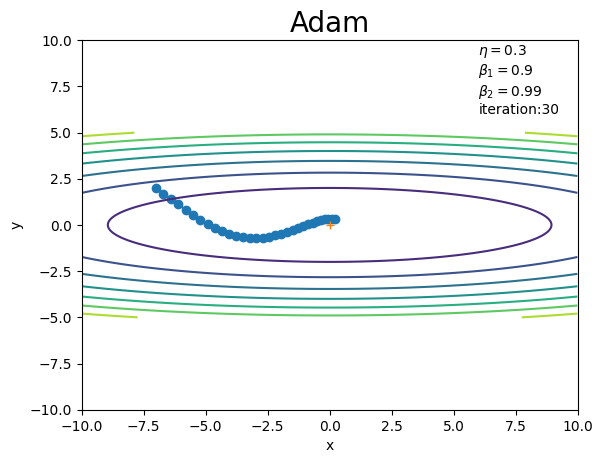

In [58]:
# 作図
# 等高線用の値
x = np.arange(-10, 10, 0.01) # x軸の値
y = np.arange(-5, 5, 0.01) # y軸の値
X, Y = np.meshgrid(x, y) # 格子状の点に変換
Z = f(X, Y)

plt.plot(x_history, y_history, 'o-') # パラメータの推移
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("Adam", fontsize=20) # タイトル
plt.text(6, 6, "$\\eta=$" + str(lr) + "\n$\\beta_1=$" + str(beta1) + "\n$\\beta_2=$" + str(beta2) + "\niteration:" + str(iter_num)) # メモ
plt.show()

## 隠れ層のアクティベーション分布

In [119]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# N(1000, 100)のデータ
x = np.random.randn(1000, 100)

# 隠れ層のノードの数
node_num = 100 

# 隠れ層の数
hidden_layer_size = 5

# アクティベーション格納リスト
activations = {}

#　順伝播
weight_scale = 1 
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * weight_scale
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
    

In [109]:
activations[0][0]

array([4.76189415e-01, 9.38202829e-08, 9.98263123e-01, 1.08167728e-01,
       9.97269245e-01, 6.57235898e-01, 1.35084731e-06, 3.94669495e-01,
       9.99897259e-01, 3.87940168e-03, 9.95614142e-01, 9.93399971e-01,
       6.28653763e-05, 9.63057325e-01, 8.30298045e-01, 3.85261178e-06,
       7.27603832e-01, 4.62927892e-02, 1.03862951e-01, 4.19821476e-02,
       9.99501039e-01, 8.57988375e-01, 2.51625826e-07, 4.76245548e-04,
       9.89967701e-07, 4.50989823e-06, 9.31915573e-01, 9.84528042e-01,
       5.19361420e-01, 9.26422383e-01, 5.71385888e-09, 1.60090184e-01,
       1.85254886e-01, 9.62558549e-01, 5.80437371e-02, 9.39532394e-01,
       2.67218363e-01, 9.99989380e-01, 2.65233748e-04, 2.67071668e-01,
       3.22035489e-02, 9.74762300e-06, 2.20831238e-06, 5.71704423e-05,
       6.19225772e-06, 7.24520785e-11, 7.35824827e-02, 9.97990500e-01,
       9.78079722e-01, 9.99991939e-01, 7.35426425e-02, 1.51007995e-07,
       1.02946982e-01, 9.92882571e-01, 9.48403807e-04, 9.80662452e-01,
      

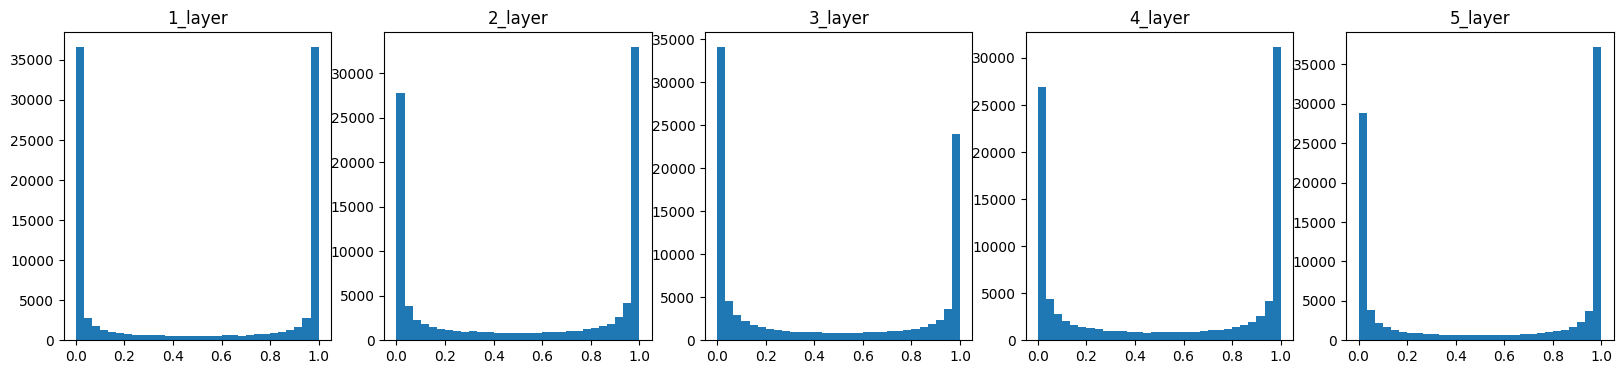

In [110]:
# ヒストグラムの描写
plt.figure(figsize=(20, 4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}_layer")
    plt.hist(a.flatten(), 30, range=(0,1))

In [112]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# N(1000, 100)のデータ
x = np.random.randn(1000, 100)

# 隠れ層のノードの数
node_num = 100 

# 隠れ層の数
hidden_layer_size = 5

# アクティベーション格納リスト
activations = {}


weight_scale = 0.01
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * weight_scale
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

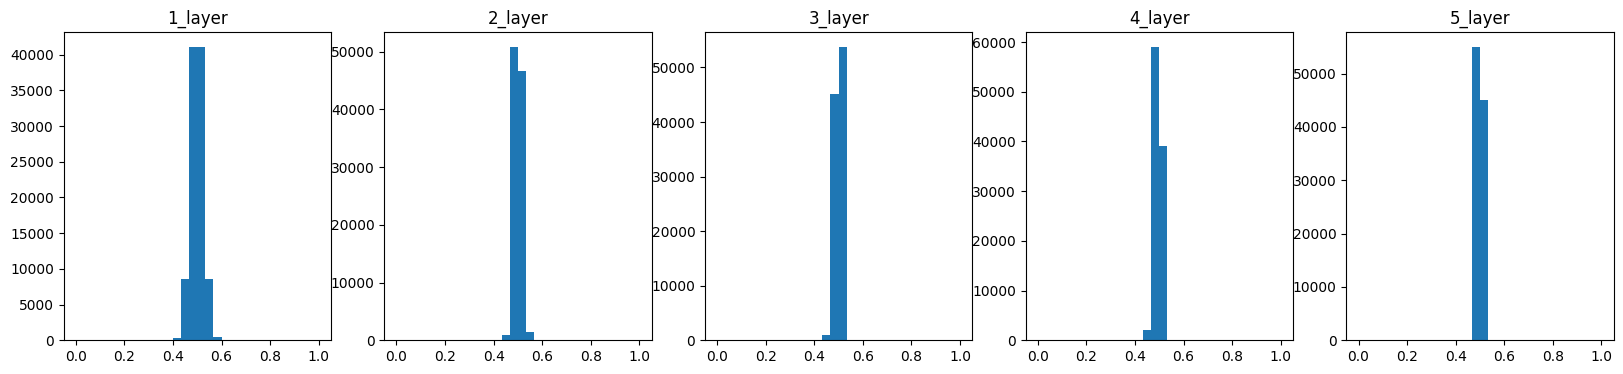

In [113]:
# ヒストグラムの描写
plt.figure(figsize=(20, 4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}_layer")
    plt.hist(a.flatten(), 30, range=(0,1))

In [183]:
dot_list = []
sig_list = []

for _ in range(100):
    x = np.random.randn(1000)
    y = np.random.randn(1000)
    dot_x = np.dot(x.T, y) 
    sig_x = sigmoid(dot_x)
    dot_list.append(dot_x)
    sig_list.append(sig_x)

(array([ 11.,  55., 103., 182., 238., 204., 120.,  65.,  15.,   7.]),
 array([-2.85477862, -2.23824211, -1.6217056 , -1.00516909, -0.38863257,
         0.22790394,  0.84444045,  1.46097697,  2.07751348,  2.69404999,
         3.3105865 ]),
 <BarContainer object of 10 artists>)

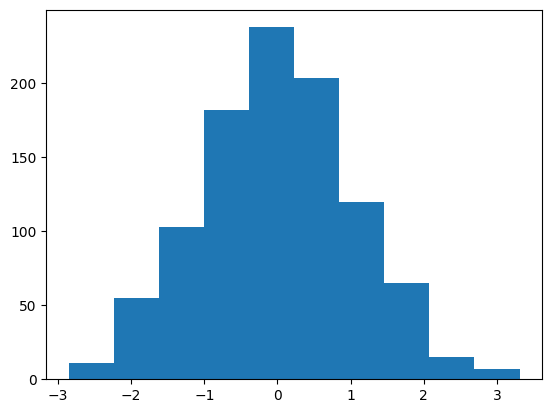

In [181]:
# 標準正規分布に従ってサンプリングされている
plt.hist(x)

(array([ 3.,  7., 12., 16., 14., 18., 15., 10.,  4.,  1.]),
 array([-66.32010285, -51.8937451 , -37.46738735, -23.0410296 ,
         -8.61467185,   5.8116859 ,  20.23804364,  34.66440139,
         49.09075914,  63.51711689,  77.94347464]),
 <BarContainer object of 10 artists>)

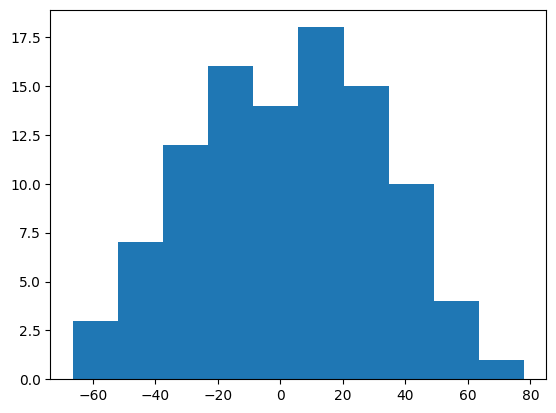

In [189]:
# 正規分布の掛け算でどう分布するか
plt.hist(dot_list)

(array([43.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0., 54.]),
 array([1.57596037e-29, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

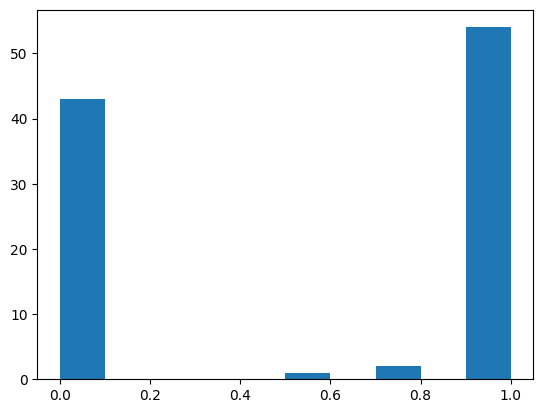

In [188]:
plt.hist(sig_list)

内積は積和なので+と-に大きくなるので,sigmoidで二極化する

In [191]:
# スケールを0.01にした場合
dot_list = []
sig_list = []

for _ in range(100):
    x = np.random.randn(1000)*0.01
    y = np.random.randn(1000)
    dot_x = np.dot(x.T, y) 
    sig_x = sigmoid(dot_x)
    dot_list.append(dot_x)
    sig_list.append(sig_x)

(array([  4.,  11.,  42.,  99., 180., 230., 222., 141.,  51.,  20.]),
 array([-0.03436784, -0.02829731, -0.02222679, -0.01615627, -0.01008574,
        -0.00401522,  0.00205531,  0.00812583,  0.01419636,  0.02026688,
         0.02633741]),
 <BarContainer object of 10 artists>)

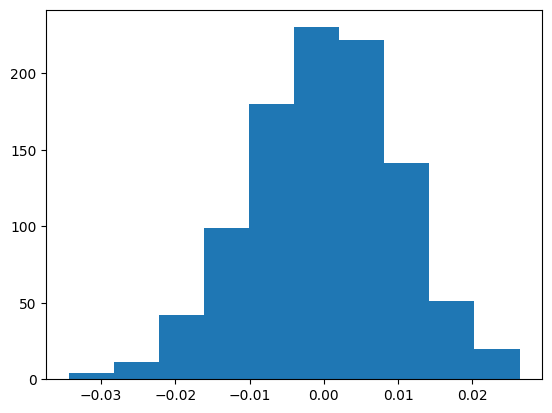

In [192]:
plt.hist(x)

(array([ 2.,  1.,  4., 14., 20., 21., 19., 12.,  5.,  2.]),
 array([-1.00483385, -0.82058822, -0.63634259, -0.45209696, -0.26785133,
        -0.0836057 ,  0.10063993,  0.28488555,  0.46913118,  0.65337681,
         0.83762244]),
 <BarContainer object of 10 artists>)

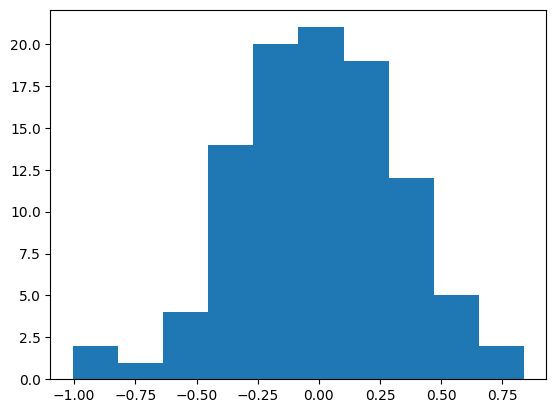

In [193]:
plt.hist(dot_list)

(array([ 0.,  0.,  2., 10., 35., 43., 10.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

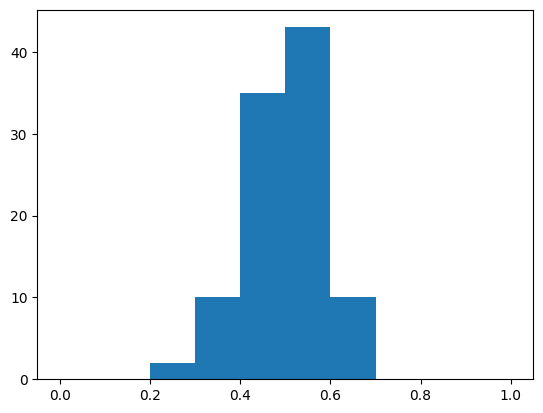

In [195]:
plt.hist(sig_list, range=(0,1))

xがN(0, 0.01)の分布で-0.03　~　0.01のかなり低い値を取るため、内積で-0.5　~　0.5の値を取るのがほどんどで、sigmoidで0.2~0.7に局所化する

## Xavierの初期値

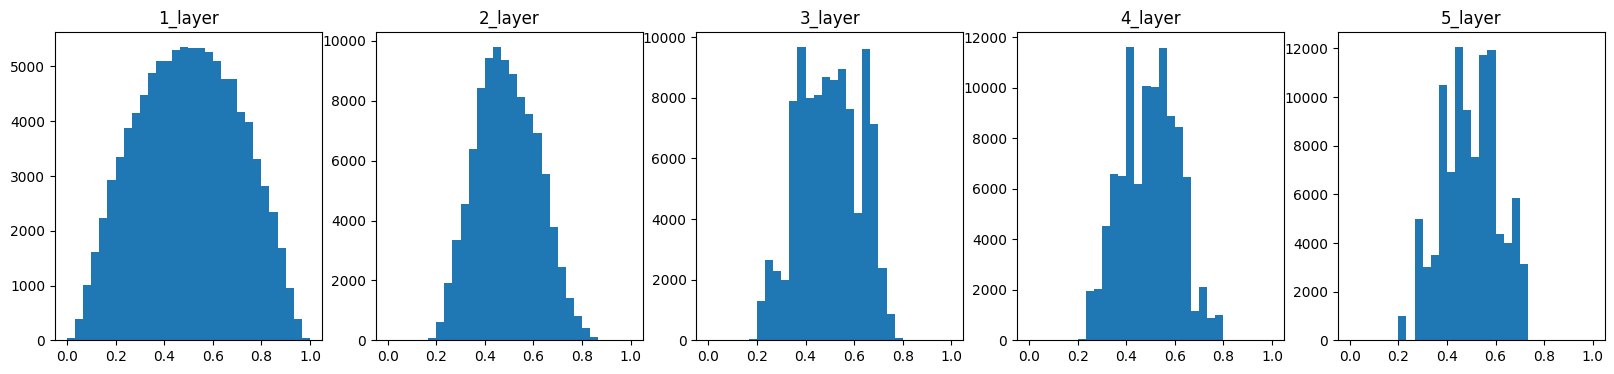

In [221]:
# N(1000, 100)のデータ
x = np.random.randn(1000, 100)

# 隠れ層のノードの数
node_num = 100 

# 隠れ層の数
hidden_layer_size = 5

# アクティベーション格納リスト
activations = {}

#　順伝播
weight_scale = 1 
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
    
# ヒストグラムの描写
plt.figure(figsize=(20, 4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}_layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    

In [217]:
# 100の入力で1の出力を1000回繰り返した場合 => 1のノードのアクティベーション分布
dot_list = []
sig_list = []

for _ in range(1000):
    x = np.random.randn(1000) / np.sqrt(1000)
    y = np.random.randn(1000)
    dot_x = np.dot(x.T, y) 
    sig_x = sigmoid(dot_x)
    dot_list.append(dot_x)
    sig_list.append(sig_x)

(array([ 33.,  87., 101., 142., 137., 140., 159., 107.,  72.,  22.]),
 array([0.04533275, 0.13775675, 0.23018075, 0.32260475, 0.41502875,
        0.50745274, 0.59987674, 0.69230074, 0.78472474, 0.87714874,
        0.96957274]),
 <BarContainer object of 10 artists>)

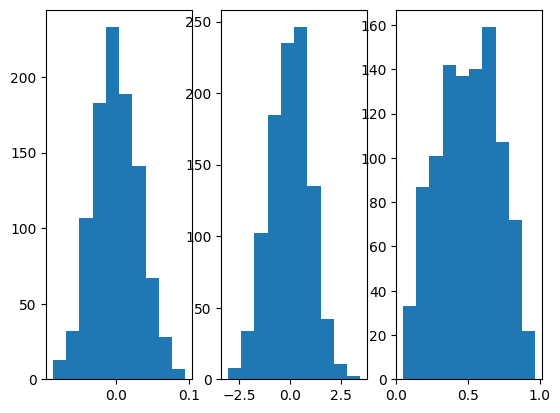

In [218]:
plt.subplot(1, 3, 1)
plt.hist(x)
plt.subplot(1, 3, 2)
plt.hist(dot_list)
plt.subplot(1, 3, 3)
plt.hist(sig_list)